In [1]:
import os
import matplotlib as mpl

font = {'family' : 'sans',
        'size'   : 12}

mpl.rc('font', **font)
mpl.rcParams['axes.formatter.useoffset'] = False

%matplotlib inline

from matplotlib.ticker import LogLocator, MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import utils.load_grid as lg

In [2]:
# Standard plotting colours
dict_colors  = {
    # From Julia's default colours
    "H2O": "#027FB1",
    "CO2": "#D24901",
    "H2" : "#008C01",
    "CH4": "#C720DD",
    "CO" : "#D1AC02",
    "N2" : "#870036",
    "S2" : "#FF8FA1",
    "SO2": "#00008B",
    "He" : "#30FF71",
    "NH3": "#675200",
}
dict_colors["OLR"] = "crimson"
dict_colors["ASF"] = "royalblue"
dict_colors["sct"] = "seagreen"
dict_colors["atm"] = "#768E95"
dict_colors["int"] = "#ff7f0e"
dict_colors["core"] = "#4d303f"
dict_colors["atm_bkg"] = (0.95, 0.98, 1.0)
dict_colors["int_bkg"] = (1.0, 0.98, 0.95)

In [3]:
output_dir = "data/article_data/jgr_proteus_grid/fiducial/"
tmin = 1e4

In [4]:
hf_all = pd.read_csv(output_dir+"runtime_helpfile.csv", sep=r"\s+")

In [5]:
options = lg.read_config(output_dir)

bump = 8.4783e+05 yr


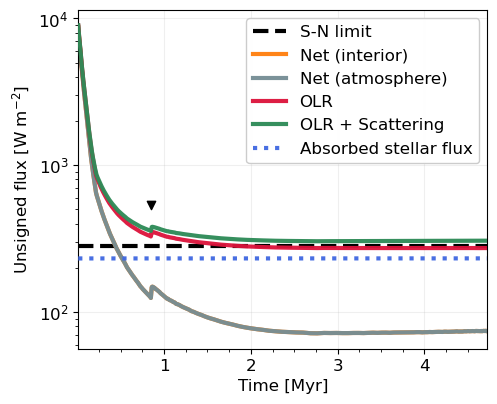

In [13]:
# Get values
hf_crop = hf_all.loc[hf_all["Time"]>tmin]
hf_crop = hf_crop.iloc[::2]
time = np.array(hf_crop["Time"]) / 1e6

F_net = np.array(hf_crop["F_atm"])
F_asf = np.array(hf_crop["F_ins"]) * options["asf_scalefactor"] * (1.0 - options["albedo_pl"]) * np.cos(options["zenith_angle"] * np.pi/180.0)
F_olr = np.array(hf_crop["F_olr"])
F_upw = np.array(hf_crop["F_olr"]) + np.array(hf_crop["F_sct"])
F_int = np.array(hf_crop["F_int"])

# Create plot
scale = 1.1
fig,ax = plt.subplots(1,1,figsize=(4.8*scale,4*scale))
lw = 3
al = 0.96

# Steam runaway line
ax.axhline(y=280.0, color='black', lw=lw, linestyle='dashed', label="S-N limit", zorder=1)

# Plot fluxes
ax.plot(time, F_int, lw=lw, alpha=al, zorder=2, color=dict_colors["int"], label="Net (interior)")
ax.plot(time, F_net, lw=lw, alpha=al, zorder=2, color=dict_colors["atm"], label="Net (atmosphere)")
ax.plot(time, F_olr, lw=lw, alpha=al, zorder=2, color=dict_colors["OLR"], label="OLR")
ax.plot(time, F_upw, lw=lw, alpha=al, zorder=3, color=dict_colors["sct"], label="OLR + Scattering")
ax.plot(time, F_asf, lw=lw, alpha=al, zorder=3, color=dict_colors["ASF"], label="Absorbed stellar flux", linestyle='dotted')

mask = np.argwhere(np.gradient(F_upw) > 0)
x = time[mask[0]]
print("bump = %.4e yr"%(x[0]*1e6))
y = F_upw[mask[0]] * 1.5
ax.scatter(x,y, color='k', marker='v', zorder=5)

# Configure plot
legend = ax.legend(loc='best')
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 0.99))
ax.grid(alpha=0.2, zorder=-2)

ax.set_xlabel("Time [Myr]")
ax.set_xlim(time[0], time[-1])
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.25))
# ax.set_xscale("log")
# ax.xaxis.set_major_locator(LogLocator(numticks=10))

ax.set_yscale("log")
ax.set_ylabel("Unsigned flux [W m$^{-2}$]")
ax.yaxis.set_major_locator(LogLocator(numticks=10))

plt.show()

for fmt in ["pdf","png"]:
    fig.savefig("output/plot_fluxes_global.%s"%fmt,bbox_inches='tight', dpi=200)
